### import libraries

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor           
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
data = pd.read_csv('electric.csv')

### EDA - Exploratory Data Analysis

In [3]:
data.head()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,None,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.00,9.30,600.71,356.00,3159.60,54.32
1,01/11/2011 00:30,None,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.00,11.10,605.42,317.00,2973.01,54.23
2,01/11/2011 01:00,None,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.00,11.10,589.97,311.00,2834.00,54.23
3,01/11/2011 01:30,None,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.00,9.30,585.94,313.00,2725.99,53.47
4,01/11/2011 02:00,None,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.00,11.10,571.52,346.00,2655.64,39.87


In [4]:
data.sample(5)

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
5734,28/02/2012 11:00,None,0,1,9,28,2,2012,22,370.70,4796.48,50.04,11.00,13.00,517.60,264.00,4678.36,51.42
2958,01/01/2012 15:00,None,0,6,52,1,1,2012,30,902.30,4223.30,44.60,7.00,24.10,456.15,990.00,3711.61,43.11
38005,31/12/2013 19:30,New Year's Eve,1,1,1,31,12,2013,39,1136.22,4286.95,74.84,6.00,22.20,311.24,1085.0,4447.42,62.05
7586,07/04/2012 02:00,Holy Saturday,1,5,14,7,4,2012,4,395.50,3013.15,42.53,9.00,31.50,490.81,437.00,2722.58,42.53
18587,22/11/2012 06:30,None,0,3,47,22,11,2012,13,995.33,3543.71,40.65,7.00,18.50,467.27,998.00,3282.93,47.70


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                38014 non-null  object
 1   Holiday                 38014 non-null  object
 2   HolidayFlag             38014 non-null  int64 
 3   DayOfWeek               38014 non-null  int64 
 4   WeekOfYear              38014 non-null  int64 
 5   Day                     38014 non-null  int64 
 6   Month                   38014 non-null  int64 
 7   Year                    38014 non-null  int64 
 8   PeriodOfDay             38014 non-null  int64 
 9   ForecastWindProduction  38014 non-null  object
 10  SystemLoadEA            38014 non-null  object
 11  SMPEA                   38014 non-null  object
 12  ORKTemperature          38014 non-null  object
 13  ORKWindspeed            38014 non-null  object
 14  CO2Intensity            38014 non-null  object
 15  Ac

In [6]:
data.isnull().sum()

DateTime                  0
Holiday                   0
HolidayFlag               0
DayOfWeek                 0
WeekOfYear                0
Day                       0
Month                     0
Year                      0
PeriodOfDay               0
ForecastWindProduction    0
SystemLoadEA              0
SMPEA                     0
ORKTemperature            0
ORKWindspeed              0
CO2Intensity              0
ActualWindProduction      0
SystemLoadEP2             0
SMPEP2                    0
dtype: int64

In [7]:
data.describe()

,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay
count,38014.000000,38014.000000,38014.000000,38014.000000,38014.000000,38014.000000,38014.000000
mean,0.040406,2.997317,28.124586,15.739412,6.904246,2012.383859,23.501105
std,0.196912,1.999959,15.587575,8.804247,3.573696,0.624956,13.853108
min,0.000000,0.000000,1.000000,1.000000,1.000000,2011.000000,0.000000
25%,0.000000,1.000000,15.000000,8.000000,4.000000,2012.000000,12.000000
50%,0.000000,3.000000,29.000000,16.000000,7.000000,2012.000000,24.000000
75%,0.000000,5.000000,43.000000,23.000000,10.000000,2013.000000,35.750000
max,1.000000,6.000000,52.000000,31.000000,12.000000,2013.000000,47.000000


### Drop the holiday column

In [8]:
data = data.drop('Holiday', axis = 1)
data.columns

Index(['DateTime', 'HolidayFlag', 'DayOfWeek', 'WeekOfYear', 'Day', 'Month',
       'Year', 'PeriodOfDay', 'ForecastWindProduction', 'SystemLoadEA',
       'SMPEA', 'ORKTemperature', 'ORKWindspeed', 'CO2Intensity',
       'ActualWindProduction', 'SystemLoadEP2', 'SMPEP2'],
      dtype='object')

## object olan degerleri sayısal değerlere cevirelim.

In [9]:
def convert(data):
    obje = data.drop('DateTime', axis = 1).select_dtypes(include = [object]).columns
    for column in obje:
        data[column] = pd.to_numeric(data[column], errors = 'coerce')
        
## pd.to_numeric(), datframe ya da serideki değerleri sayısal değerlere dönüştürmek için kullanılır.
## errors='coerce', dönüştürme işlemi sırasında hatalı veya dönüştürülemeyen değerlere "NaN" olarak doldurur.

In [10]:
convert(data)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DateTime                38014 non-null  object 
 1   HolidayFlag             38014 non-null  int64  
 2   DayOfWeek               38014 non-null  int64  
 3   WeekOfYear              38014 non-null  int64  
 4   Day                     38014 non-null  int64  
 5   Month                   38014 non-null  int64  
 6   Year                    38014 non-null  int64  
 7   PeriodOfDay             38014 non-null  int64  
 8   ForecastWindProduction  38009 non-null  float64
 9   SystemLoadEA            38012 non-null  float64
 10  SMPEA                   38012 non-null  float64
 11  ORKTemperature          37719 non-null  float64
 12  ORKWindspeed            37715 non-null  float64
 13  CO2Intensity            38007 non-null  float64
 14  ActualWindProduction    38009 non-null

In [12]:
data.isnull().sum()

DateTime                    0
HolidayFlag                 0
DayOfWeek                   0
WeekOfYear                  0
Day                         0
Month                       0
Year                        0
PeriodOfDay                 0
ForecastWindProduction      5
SystemLoadEA                2
SMPEA                       2
ORKTemperature            295
ORKWindspeed              299
CO2Intensity                7
ActualWindProduction        5
SystemLoadEP2               2
SMPEP2                      2
dtype: int64

## bos hucreleri ortalama ile dolduralim.

In [13]:
def bos_doldur(column):
        data[column] = data[column].fillna(data[column].mean())

In [14]:
bos_doldur('ForecastWindProduction')
bos_doldur('SystemLoadEA')
bos_doldur('SMPEA')
bos_doldur('ORKTemperature')
bos_doldur('ORKWindspeed')
bos_doldur('CO2Intensity')
bos_doldur('ActualWindProduction')
bos_doldur('SystemLoadEP2')
bos_doldur('SMPEP2')

In [15]:
data.isna().sum()

DateTime                  0
HolidayFlag               0
DayOfWeek                 0
WeekOfYear                0
Day                       0
Month                     0
Year                      0
PeriodOfDay               0
ForecastWindProduction    0
SystemLoadEA              0
SMPEA                     0
ORKTemperature            0
ORKWindspeed              0
CO2Intensity              0
ActualWindProduction      0
SystemLoadEP2             0
SMPEP2                    0
dtype: int64

## Corelasyon

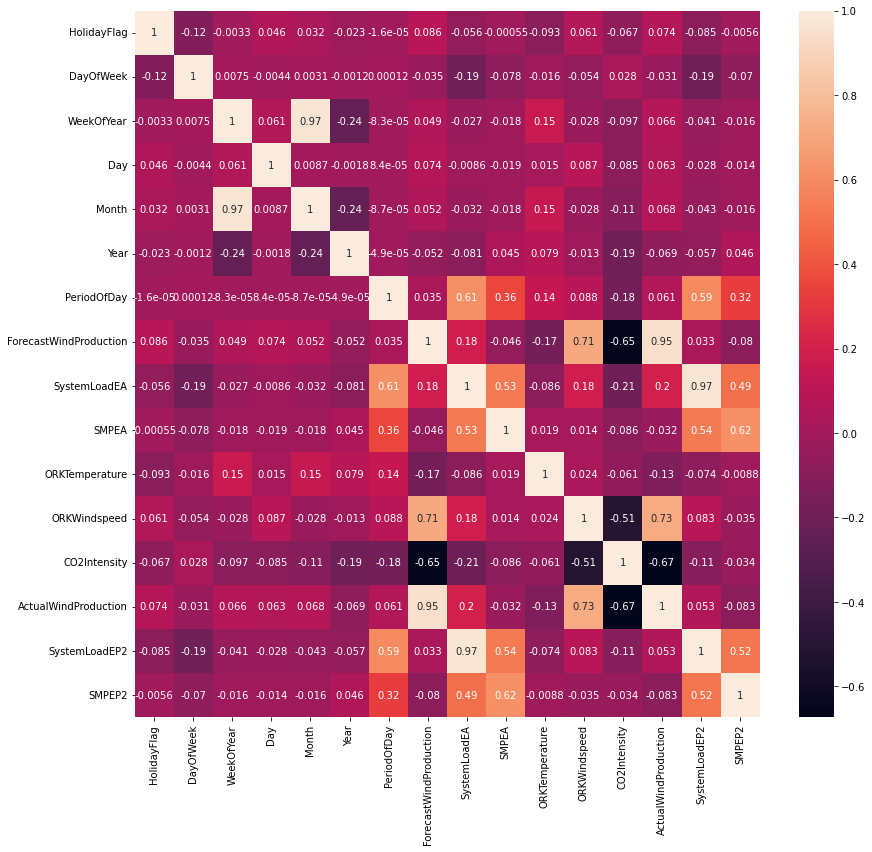

In [16]:
plt.figure(figsize = (14, 13))
sbn.heatmap(data.corr(), annot = True);

## x and y

In [17]:
x = data.iloc[:1000, 4:-1]
x

,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2
0,1,11,2011,0,315.31,3388.77,49.26,6.0,9.3,600.71,356.0,3159.60
1,1,11,2011,1,321.80,3196.66,49.26,6.0,11.1,605.42,317.0,2973.01
2,1,11,2011,2,328.57,3060.71,49.10,5.0,11.1,589.97,311.0,2834.00
3,1,11,2011,3,335.60,2945.56,48.04,6.0,9.3,585.94,313.0,2725.99
4,1,11,2011,4,342.90,2849.34,33.75,6.0,11.1,571.52,346.0,2655.64
...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,11,2011,35,164.90,5964.00,286.97,6.0,33.3,497.26,187.0,5816.35
996,21,11,2011,36,172.11,5868.80,98.26,6.0,29.6,500.23,191.0,5653.36
997,21,11,2011,37,179.72,5661.73,70.63,6.0,24.1,497.35,200.0,5470.16
998,21,11,2011,38,187.79,5533.23,65.61,6.0,22.2,502.85,180.0,5384.26


In [18]:
y = data.iloc[:1000,-1:].values
y

array([[ 54.32],
       [ 54.23],
       [ 54.23],
       [ 53.47],
       [ 39.87],
       [ 39.87],
       [ 39.87],
       [ 39.87],
       [ 39.87],
       [ 39.87],
       [ 39.87],
       [ 39.87],
       [ 51.45],
       [ 51.45],
       [ 52.82],
       [ 53.65],
       [ 54.21],
       [ 58.33],
       [ 58.33],
       [ 58.33],
       [ 58.33],
       [ 58.27],
       [ 58.26],
       [ 58.26],
       [ 58.26],
       [ 58.15],
       [ 54.74],
       [ 54.74],
       [ 54.14],
       [ 53.63],
       [ 53.63],
       [ 53.63],
       [ 54.74],
       [ 58.15],
       [130.38],
       [189.73],
       [130.38],
       [ 58.26],
       [ 58.26],
       [ 54.14],
       [ 54.74],
       [ 54.74],
       [ 53.63],
       [ 54.74],
       [ 53.  ],
       [ 53.  ],
       [ 51.61],
       [ 51.61],
       [ 51.45],
       [ 36.53],
       [ 36.53],
       [ 36.53],
       [  5.66],
       [  5.66],
       [  5.66],
       [  5.66],
       [  5.66],
       [  5.66],
       [ 36.53

## Create machine learning Model

In [45]:
def regression(x, y):
    lin = LinearRegression()
    rid = Ridge()
    las = Lasso()
    ela = ElasticNet()
    sup = SVR(kernel = "linear")
    ran = RandomForestRegressor()
    dec = DecisionTreeRegressor()
    ab = AdaBoostRegressor()
    gb = GradientBoostingRegressor()
    b = BaggingRegressor()
    ex = ExtraTreesRegressor()
    ext = ExtraTreeRegressor()
    hi = HistGradientBoostingRegressor()
    
    models = [lin, rid, las, ela, sup, ran, dec, ab, gb, b, ex, ext, hi]
    model_names = ["Linear_R", "Ridge", "Lasso", "Elastic", "Support", "Random", "Decision_T", 'AdaBoost', 'GradientBoost',
                  'Bagging', 'ExtraTrees', 'ExtraTree', 'HistGradient']
    
    x_train, x_test, y_train, y_true = train_test_split(x, y, test_size = 0.2, random_state = 42)
    x_train = StandardScaler().fit_transform(x_train)
    x_test = StandardScaler().fit_transform(x_test)
    
    r2 = []
    
    result = pd.DataFrame(columns = ["r2_score"], index = model_names)
    
    for model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        r2.append(r2_score(y_true, y_pred) * 100)
       
        
    result["r2_score"] = r2
   
        
    return result.sort_values("r2_score", ascending = False) 

In [46]:
regression(x, y)

,r2_score
Random,75.311033
Bagging,74.947940
HistGradient,74.377234
ExtraTrees,70.793513
AdaBoost,62.907598
GradientBoost,61.969165
Ridge,61.625992
Linear_R,61.624244
Lasso,61.563438
Elastic,54.687319


### Create Neural Network

In [69]:
x_train, x_test, y_train, y_true = train_test_split(x, y, test_size = 0.3, random_state = 42)
x_train = MinMaxScaler().fit_transform(x_train)
x_test = MinMaxScaler().fit_transform(x_test)

In [70]:
model = Sequential()
model.add(Dense(units = 124, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 124, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 30, activation = 'relu'))
model.add(Dense(units = 1, activation = 'linear'))

model.compile(loss = 'mse', metrics = 'MeanSquaredError', optimizer = 'Adam')

In [71]:
early_stopping = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 25)

In [72]:
history = model.fit(x_train, y_train, epochs = 200, validation_data = (x_test, y_true), callbacks = [early_stopping], verbose = 1)

Epoch 1/200
22/22 [==============================] - 2s 14ms/step - loss: 3720.5193 - mean_squared_error: 3720.5193 - val_loss: 2938.4685 - val_mean_squared_error: 2938.4685
Epoch 2/200
22/22 [==============================] - 0s 8ms/step - loss: 1638.5377 - mean_squared_error: 1638.5377 - val_loss: 1846.7881 - val_mean_squared_error: 1846.7881
Epoch 3/200
22/22 [==============================] - 0s 7ms/step - loss: 1455.9532 - mean_squared_error: 1455.9532 - val_loss: 1664.1473 - val_mean_squared_error: 1664.1473
Epoch 4/200
22/22 [==============================] - 0s 7ms/step - loss: 1308.0121 - mean_squared_error: 1308.0121 - val_loss: 1655.9628 - val_mean_squared_error: 1655.9628
Epoch 5/200
22/22 [==============================] - 0s 7ms/step - loss: 1385.0404 - mean_squared_error: 1385.0404 - val_loss: 1249.0013 - val_mean_squared_error: 1249.0013
Epoch 6/200
22/22 [==============================] - 0s 7ms/step - loss: 1187.5483 - mean_squared_error: 1187.5483 - val_loss: 1407.31

22/22 [==============================] - 0s 8ms/step - loss: 826.0481 - mean_squared_error: 826.0481 - val_loss: 938.4198 - val_mean_squared_error: 938.4198
Epoch 49/200
22/22 [==============================] - 0s 7ms/step - loss: 849.0806 - mean_squared_error: 849.0806 - val_loss: 1165.0146 - val_mean_squared_error: 1165.0146
Epoch 50/200
22/22 [==============================] - 0s 9ms/step - loss: 820.8132 - mean_squared_error: 820.8132 - val_loss: 974.4018 - val_mean_squared_error: 974.4018
Epoch 51/200
22/22 [==============================] - 0s 9ms/step - loss: 900.2282 - mean_squared_error: 900.2282 - val_loss: 943.4271 - val_mean_squared_error: 943.4271
Epoch 52/200
22/22 [==============================] - 0s 7ms/step - loss: 843.9765 - mean_squared_error: 843.9765 - val_loss: 1147.9833 - val_mean_squared_error: 1147.9833
Epoch 53/200
22/22 [==============================] - 0s 7ms/step - loss: 893.3567 - mean_squared_error: 893.3567 - val_loss: 1128.5784 - val_mean_squared_erro

In [73]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 124)               1612      
                                                                 
 dense_20 (Dense)            (None, 512)               64000     
                                                                 
 dense_21 (Dense)            (None, 256)               131328    
                                                                 
 dense_22 (Dense)            (None, 512)               131584    
                                                                 
 dense_23 (Dense)            (None, 512)               262656    
                                                                 
 dense_24 (Dense)            (None, 124)               63612     
                                                                 
 dense_25 (Dense)            (None, 512)              

In [74]:
tahmin = model.predict(x_test)
tahmin

10/10 [==============================] - 0s 2ms/step


array([[ 56.732674],
       [ 56.95305 ],
       [ 62.708843],
       [113.66725 ],
       [ 57.448303],
       [ 45.029728],
       [ 40.27552 ],
       [ 61.219414],
       [ 58.41192 ],
       [ 73.971794],
       [ 55.389877],
       [ 58.508778],
       [ 40.153877],
       [ 47.710564],
       [ 58.722504],
       [166.89384 ],
       [ 60.095787],
       [ 52.105286],
       [ 60.81996 ],
       [ 55.818977],
       [ 65.60033 ],
       [ 47.127216],
       [133.70029 ],
       [ 51.2434  ],
       [ 56.226837],
       [ 56.332336],
       [ 38.323692],
       [ 54.662457],
       [ 67.37602 ],
       [101.22669 ],
       [ 44.119118],
       [ 55.866634],
       [ 50.438034],
       [ 59.56389 ],
       [ 73.21502 ],
       [ 49.189636],
       [ 54.510246],
       [ 32.010918],
       [103.41967 ],
       [ 16.14299 ],
       [ 53.204037],
       [ 47.943653],
       [ 59.271652],
       [ 50.217896],
       [ 51.868206],
       [117.27698 ],
       [ 45.09267 ],
       [ 49.7

In [75]:
r2_score(y_true, tahmin) * 100

57.25915736254053

<AxesSubplot:>

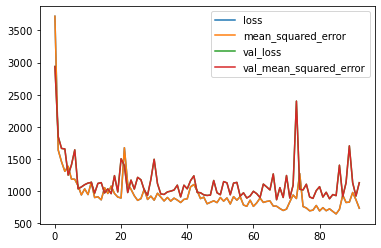

In [76]:
loss = pd.DataFrame(history.history)
loss.plot()